### Titanic | ML Classification Prediction Algorithms with accuracy (79.2%)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn import svm
import warnings

In [2]:
warnings.filterwarnings('ignore')

## EDA

In [3]:
df_train = pd.read_csv("../input/titanic/train.csv",index_col="PassengerId")
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test = pd.read_csv("../input/titanic/test.csv", index_col="PassengerId")
df_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df_train.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6])

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [7]:
Y_test = pd.read_csv("../input/titanic/gender_submission.csv", index_col="PassengerId")
Y_test.head()

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [9]:
df_train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

## Data Cleaning & Encoding

In [10]:
df_train[["Embarked","Name"]].groupby(by=["Embarked"],as_index=True).count().sort_values("Name",ascending=False)

,Name
Embarked,
S,644
C,168
Q,77


In [11]:
# so we notes that Most repeated Embarked is S, so that we can replace null value in Embarked column with it.
most_repeated = "S"
df_train.Embarked.replace(np.nan, most_repeated, inplace=True)
df_test.Embarked.replace(np.nan, most_repeated, inplace=True)
print("the number of null value in Embarked Column =",df_train.Embarked.isnull().sum())

the number of null value in Embarked Column = 0


In [12]:
# transform Embarked Column to numeric.
Embarked_transform_dict = {"S":1, "C":2, "Q":3}
for value in Embarked_transform_dict:
    df_train.Embarked.replace(value, Embarked_transform_dict.get(value), inplace=True)
    df_test.Embarked.replace(value, Embarked_transform_dict.get(value), inplace=True)
df_train.head(5)
# we now finish cleaning and transform column Emvarked to numeric.

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,2
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,1


In [13]:
print("the number of null value in Cabin Column =", df_train.Cabin.isnull().sum())
# notes that null values is 687 from 891 (77%) of Cabin column is null, so i will droped it from data.

the number of null value in Cabin Column = 687


In [14]:
df_train.drop("Cabin", axis=1, inplace=True)
df_test.drop("Cabin", axis=1, inplace=True)

df_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,2
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,1
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,1
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,1
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,1


In [15]:
# Enter to Fare column
# calculate the range of value in Fare column.
print("Range of Fare column values = ", df_train.Fare.max() - df_train.Fare.min())
# min value is 0.0 and max value = 512.3292
# i will divied this range to 10 sections.
df_test.Fare.replace(np.nan, df_test.Fare.mean(), inplace=True)
print("Range of Fare column values = ", df_test.Fare.max() - df_test.Fare.min())

Range of Fare column values =  512.3292
Range of Fare column values =  512.3292


In [16]:
df_train.Fare = df_train.Fare.astype("int64")
df_test.Fare = df_test.Fare.astype("int64")

# df_train.info()
df_test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7,3
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7,1
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9,3
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8,1
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12,1
...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8,1
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108,2
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7,1


In [17]:
bins_i = [-1, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550]
labels_i = [1,2,3,4,5,6,7,8,9,10,11]

df_train['stage'] = 0
df_train['stage'] = pd.cut(df_train.Fare, bins=bins_i, labels=labels_i)

df_test['stage'] = 0
df_test['stage'] = pd.cut(df_test.Fare, bins=bins_i, labels=labels_i)

df_train.stage.unique()

[1, 2, 6, 3, 5, 11, 4]
Categories (7, int64): [1 < 2 < 3 < 4 < 5 < 6 < 11]

In [18]:
df_train.Fare = df_train.stage.astype("int64")
df_test.Fare = df_test.stage.astype("int64")
df_train.drop("stage", axis=1, inplace=True)
df_test.drop("stage", axis=1, inplace=True)

In [19]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,2,2
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,1,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,2,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,1,1


In [20]:
df_test.Fare.unique()

array([ 1,  2,  6,  5,  4,  3, 11])

In [21]:
df_train.Ticket.unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [22]:
# i drop this column, because this is column is outlayer of data not need.
df_train.drop("Ticket", axis=1, inplace=True)
df_test.drop("Ticket", axis=1, inplace=True)

In [23]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,1,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,2,2
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,1,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,2,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,1,1


In [24]:
# Sex column.
Sex_dict = {"male":1, "female":2}
for key, value in Sex_dict.items():
    df_train.Sex.replace(key, value, inplace=True)
    df_test.Sex.replace(key, value, inplace=True)
df_train.Sex = df_train.Sex.astype("int64")
df_test.Sex = df_test.Sex.astype("int64")
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,1,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,2,2
3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,1,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,2,1
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,1,1


In [25]:
df_train["Title"] = 0

titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
data = [df_train, df_test]
for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace(['Mlle','Ms'], 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
df_train = df_train.drop(['Name'], axis=1)
df_test = df_test.drop(['Name'], axis=1)
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
PassengerId,,,,,,,,,
1,0,3,1,22.0,1,0,1,1,1
2,1,1,2,38.0,1,0,2,2,3
3,1,3,2,26.0,0,0,1,1,2
4,1,1,2,35.0,1,0,2,1,3
5,0,3,1,35.0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...
887,0,2,1,27.0,0,0,1,1,5
888,1,1,2,19.0,0,0,1,1,2
889,0,3,2,NaN,1,2,1,1,2


In [26]:
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
Title         0
dtype: int64

In [27]:
df_Age_train = df_train.loc[pd.notna(df_train.Age)]
df_Age_train.Age = df_Age_train.Age.astype("float64")
df_Age_train.Age = (df_Age_train.Age - df_Age_train.Age.mean()) / df_Age_train.Age.std()
df_Age_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
PassengerId,,,,,,,,,
1,0,3,1,-0.530005,1,0,1,1,1
2,1,1,2,0.571430,1,0,2,2,3
3,1,3,2,-0.254646,0,0,1,1,2
4,1,1,2,0.364911,1,0,2,1,3
5,0,3,1,0.364911,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...
886,0,3,2,0.640270,0,5,1,3,3
887,0,2,1,-0.185807,0,0,1,1,5
888,1,1,2,-0.736524,0,0,1,1,2


In [28]:
df_Age_train.Survived.corr(df_Age_train.Age)
# so i will drop Age column, because it is correlation between Age and Survived is very small.

-0.07722109457217771

In [29]:
df_train.drop("Age", axis=1, inplace=True)
df_test.drop("Age", axis=1, inplace=True)
df_train

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title
PassengerId,,,,,,,,
1,0,3,1,1,0,1,1,1
2,1,1,2,1,0,2,2,3
3,1,3,2,0,0,1,1,2
4,1,1,2,1,0,2,1,3
5,0,3,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...
887,0,2,1,0,0,1,1,5
888,1,1,2,0,0,1,1,2
889,0,3,2,1,2,1,1,2


In [30]:
df_test

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title
PassengerId,,,,,,,
892,3,1,0,0,1,3,1
893,3,2,1,0,1,1,3
894,2,1,0,0,1,3,1
895,3,1,0,0,1,1,1
896,3,2,1,1,1,1,3
...,...,...,...,...,...,...,...
1305,3,1,0,0,1,1,1
1306,1,2,0,0,3,2,5
1307,3,1,0,0,1,1,1


In [31]:
data = [df_train, df_test]
for dataset in data:
    dataset['FamilySize'] = dataset['SibSp'] +  dataset['Parch'] + 1

In [32]:

for dataset in data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

print (df_train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


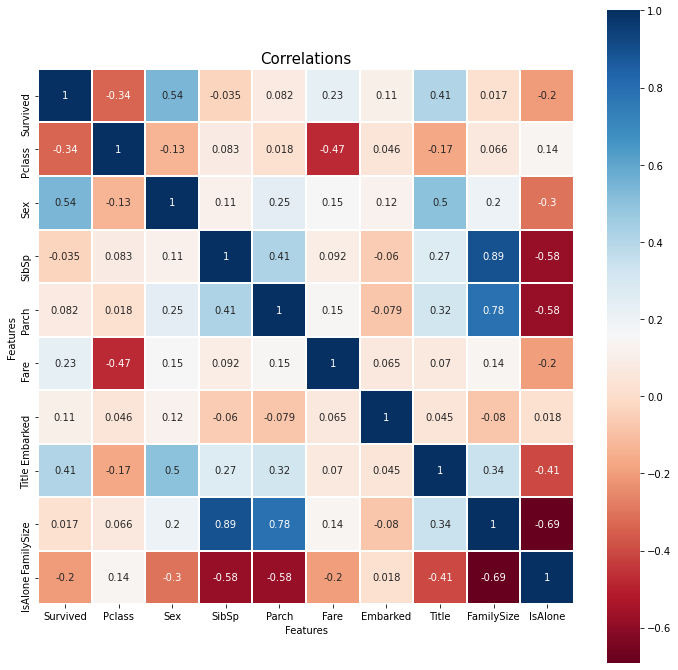

In [33]:
colormap=plt.cm.RdBu
figure = plt.figure(figsize=(12,12))
sns.heatmap(df_train.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.title("Correlations",size=15)
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

In [34]:
columns = ["Pclass","Sex", "Fare", "Embarked","Title","IsAlone"]
X_train = df_train[columns]
Y_train = df_train["Survived"]
len(Y_train)

891

In [35]:
X_test = df_test[columns]
len(X_test)

418

In [36]:
len(Y_test)

418

## ML Clasification Prediction

### 1- SGDClassifier (66%)

In [37]:
sgd_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd_clf.fit(X_train, Y_train)
Y_pred_SGD = sgd_clf.predict(X_test)
print("the train score of SGD = ",round(sgd_clf.score(X_train, Y_train) *100, 2),"%")

the train score of SGD =  70.82 %


### 2- Random Forest (78%)

In [38]:
random_forest = RandomForestClassifier(n_estimators=40, min_samples_leaf=2, max_features=0.1, n_jobs=-1)
random_forest.fit(X_train, Y_train)
Y_pred_Random = random_forest.predict(X_test)
print("the train score of random_forest = ",round(random_forest.score(X_train, Y_train) *100, 2),"%")

the train score of random_forest =  84.18 %


### 3- Logistic Regression (76.6%)

In [39]:
logistic_regression = LogisticRegression(solver='liblinear',max_iter=1000)
logistic_regression.fit(X_train, Y_train)
Y_pred_Logistic = logistic_regression.predict(X_test)
print("the train score of logistic_regression = ",round(logistic_regression.score(X_train, Y_train) *100, 2),"%")

the train score of logistic_regression =  78.11 %


### 4- Decision Tree (78%)

In [40]:
tree = DecisionTreeClassifier(random_state=25)
tree.fit(X_train, Y_train)
Y_pred_Tree= tree.predict(X_test)
print("the score of prediction = ",round(tree.score(X_train, Y_train) * 100,2), "%")

the score of prediction =  84.4 %


In [41]:
scores= cross_val_score(tree, X_train, Y_train, scoring="accuracy", cv=100)
scores.mean()

0.8190277777777779

### 5- SVM (76.55%)

In [42]:

clf = svm.SVC(kernel = 'linear')
clf.fit(X_train, Y_train)
Y_predict_svm = clf.predict(X_test)
print("the score of prediction = ",round(clf.score(X_train, Y_train) * 100,2), "%")

the score of prediction =  78.68 %


### 6- KNeighbors (79.18%)

In [43]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
Y_pred_KNN= knn.predict(X_test)
print("the score of prediction = ",round(knn.score(X_train, Y_train) * 100,2), "%")

the score of prediction =  82.6 %


In [44]:
output_csv = {"PassengerId":[*range(892,892+len(Y_pred_KNN))], "Survived":Y_pred_KNN}
Y_pre = pd.DataFrame(output_csv)
Y_pre.set_index("PassengerId", drop=True, append=False, inplace=True)
Y_pre.to_csv("/kaggle/working/submission.csv")

### 7- MlPClassifier (77.5%)

In [45]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(3, 2), random_state=1)
clf.fit(X_train, Y_train)
Y_pred_clf= clf.predict(X_test)
print("the score of prediction = ",round(clf.score(X_train, Y_train) * 100,2), "%")

the score of prediction =  61.62 %


### 8- GaussianNB (74.6%)

In [46]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred_gaussian = gaussian.predict(X_test)
print("the train score for Gaussian = ", round(gaussian.score(X_train, Y_train) * 100, 2), "%")

the train score for Gaussian =  77.78 %


### 9- Perceptron (78.2%)

In [47]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred_perceptron = perceptron.predict(X_test)
print("the train score for Perceptron = ",round(perceptron.score(X_train, Y_train) * 100, 2), "%")

the train score for Perceptron =  78.11 %


In [48]:
# !kaggle competitions download -c titanic
# !kaggle competitions submit -c titanic -f /kaggle/working/submission.csv -m "submission"

In [49]:
model = ["SGDClassifier", "Random Forest", "Logistic Regression", "Decision Tree", "SVM",
"KNeighbors", "MlPClassifier", "GaussianNB", "Perceptron"]
score = [66, 78, 76.6, 78, 76.55, 79.18, 77.5, 74.6, 78.2]
data_dict = {"models": model, "test_score": score}
data_score = pd.DataFrame(data_dict)
data_score.index = data_score.index + 1
data_score.sort_values("test_score",ascending=False)

,models,test_score
6,KNeighbors,79.18
9,Perceptron,78.20
2,Random Forest,78.00
4,Decision Tree,78.00
7,MlPClassifier,77.50
3,Logistic Regression,76.60
5,SVM,76.55
8,GaussianNB,74.60
1,SGDClassifier,66.00
